<h1><center> Challenge Data Science - AluraVoz </center></h1>
<h1><center> ETAPA I </center></h1>

## Objetivo:
###   - A partir de uma base de dados, identificar e classificar os clientes com maior chance de deixar a empresa a fim de reduzir a Taxa de Churn.

## 1 - Metodologia:
### 1.1 - Tratamento da base de dados
### 1.2 - Análise das variáveis qualitativas
### 1.3 - Análise das variáveis quantitativas

## 1.1 - Tratamento da base de dados

### Importação dos dados e pacotes necessários

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_json('https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json')

In [3]:
dataset.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [5]:
dados_clientes = pd.json_normalize(dataset.customer)
dados_phone = pd.json_normalize(dataset.phone)
dados_internet = pd.json_normalize(dataset.internet)
dados_contas = pd.json_normalize(dataset.account)
dataset = dataset.drop(columns='customer')
dataset = dataset.drop(columns='phone')
dataset = dataset.drop(columns='internet')
dataset = dataset.drop(columns='account')
dataset = pd.concat([dataset,dados_clientes,dados_phone,dados_internet,dados_contas], axis=1)

In [6]:
dataset.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [8]:
colunas = {'customerID':'Identificação',
    'Churn':'Evasão',
    'gender':'Gênero',
    'SeniorCitizen':'Maior_65_anos',
    'Partner':'ParceirX',
    'Dependents':'Dependentes',
    'tenure':'Meses contratados',
    'PhoneService':'Serviço Telefônico',
    'MultipleLines':'Mais de uma linha',
    'InternetService':'Serviço de Internet',
    'OnlineSecurity':'Adicional de Segurança',
    'OnlineBackup':'Assinatura de Backup',
    'DeviceProtection':'Assinatura de Proteção',
    'TechSupport':'Assinatura de Suporte',
    'StreamingTV':'TV a cabo',
    'StreamingMovies':'Assinatura de Streaming',
    'Contract':'Tipo de Contrato',
    'PaperlessBilling':'Fatura Online',
    'PaymentMethod':'Forma de Pagamento',
    'Charges.Monthly':'Mensalidade',
    'Charges.Total':'Total Gasto'}

In [9]:
dataset = dataset.rename(columns=colunas)

In [10]:
dataset = dataset.replace({'Yes':'Sim','No':'Não','Female':'Feminino','Male':'Masculino'})
dataset = dataset.replace('Fiber optic','Fibra Ótica')
dataset = dataset.replace({'One year':'Anual', 'Month-to-month':'Mensal', 'Two year':'Dois anos'})
dataset = dataset.replace({'Mailed check':'Cheque', 'Electronic check':'Cheque Eletrônico', 'Credit card (automatic)':'Crédito',
       'Bank transfer (automatic)':'Transferência'})
dataset = dataset.replace('','Sem Registro')

In [11]:
dataset['Maior_65_anos'] = dataset['Maior_65_anos'].replace({0:'Menor',1:'Maior'})

In [12]:
dataset.head()

,Identificação,Evasão,Gênero,Maior_65_anos,ParceirX,Dependentes,Meses contratados,Serviço Telefônico,Mais de uma linha,Serviço de Internet,...,Assinatura de Backup,Assinatura de Proteção,Assinatura de Suporte,TV a cabo,Assinatura de Streaming,Tipo de Contrato,Fatura Online,Forma de Pagamento,Mensalidade,Total Gasto
0,0002-ORFBO,Não,Feminino,Menor,Sim,Sim,9,Sim,Não,DSL,...,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque,65.6,593.3
1,0003-MKNFE,Não,Masculino,Menor,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Não,Sim,Mensal,Não,Cheque,59.9,542.4
2,0004-TLHLJ,Sim,Masculino,Menor,Não,Não,4,Sim,Não,Fibra Ótica,...,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque Eletrônico,73.9,280.85
3,0011-IGKFF,Sim,Masculino,Maior,Sim,Não,13,Sim,Não,Fibra Ótica,...,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque Eletrônico,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Maior,Sim,Não,3,Sim,Não,Fibra Ótica,...,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque,83.9,267.4


In [13]:
dataset['Evasão'].unique()

array(['Não', 'Sim', 'Sem Registro'], dtype=object)

In [14]:
id_sem_registro = dataset[dataset['Evasão'].values == 'Sem Registro'].index
dataset = dataset.drop(id_sem_registro)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Identificação            7043 non-null   object 
 1   Evasão                   7043 non-null   object 
 2   Gênero                   7043 non-null   object 
 3   Maior_65_anos            7043 non-null   object 
 4   ParceirX                 7043 non-null   object 
 5   Dependentes              7043 non-null   object 
 6   Meses contratados        7043 non-null   int64  
 7   Serviço Telefônico       7043 non-null   object 
 8   Mais de uma linha        7043 non-null   object 
 9   Serviço de Internet      7043 non-null   object 
 10  Adicional de Segurança   7043 non-null   object 
 11  Assinatura de Backup     7043 non-null   object 
 12  Assinatura de Proteção   7043 non-null   object 
 13  Assinatura de Suporte    7043 non-null   object 
 14  TV a cabo               

In [16]:
dataset.head(10)

,Identificação,Evasão,Gênero,Maior_65_anos,ParceirX,Dependentes,Meses contratados,Serviço Telefônico,Mais de uma linha,Serviço de Internet,...,Assinatura de Backup,Assinatura de Proteção,Assinatura de Suporte,TV a cabo,Assinatura de Streaming,Tipo de Contrato,Fatura Online,Forma de Pagamento,Mensalidade,Total Gasto
0,0002-ORFBO,Não,Feminino,Menor,Sim,Sim,9,Sim,Não,DSL,...,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque,65.60,593.3
1,0003-MKNFE,Não,Masculino,Menor,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Não,Sim,Mensal,Não,Cheque,59.90,542.4
2,0004-TLHLJ,Sim,Masculino,Menor,Não,Não,4,Sim,Não,Fibra Ótica,...,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque Eletrônico,73.90,280.85
3,0011-IGKFF,Sim,Masculino,Maior,Sim,Não,13,Sim,Não,Fibra Ótica,...,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque Eletrônico,98.00,1237.85
4,0013-EXCHZ,Sim,Feminino,Maior,Sim,Não,3,Sim,Não,Fibra Ótica,...,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque,83.90,267.4
5,0013-MHZWF,Não,Feminino,Menor,Não,Sim,9,Sim,Não,DSL,...,Não,Não,Sim,Sim,Sim,Mensal,Sim,Crédito,69.40,571.45
6,0013-SMEOE,Não,Feminino,Maior,Sim,Não,71,Sim,Não,Fibra Ótica,...,Sim,Sim,Sim,Sim,Sim,Dois anos,Sim,Transferência,109.70,7904.25
7,0014-BMAQU,Não,Masculino,Menor,Sim,Não,63,Sim,Sim,Fibra Ótica,...,Não,Não,Sim,Não,Não,Dois anos,Sim,Crédito,84.65,5377.8
8,0015-UOCOJ,Não,Feminino,Maior,Não,Não,7,Sim,Não,DSL,...,Não,Não,Não,Não,Não,Mensal,Sim,Cheque Eletrônico,48.20,340.35
9,0016-QLJIS,Não,Feminino,Menor,Sim,Sim,65,Sim,Sim,DSL,...,Sim,Sim,Sim,Sim,Sim,Dois anos,Sim,Cheque,90.45,5957.9


<div class='alert alert-block alert-success'>
    <b> O tratamento dos dados consistiu em separar as colunas que continham mais de uma informação, traduzir para o português e excluir os dados irrelevantes para a análise.<b>
</div>

## 1.2 - Análise das variáveis qualitativas

In [17]:
evasao = dataset.query('Evasão == "Sim"')
permanencia = dataset.query('Evasão == "Não"')

In [18]:
def graf_pizza(variavel):
    df1 = pd.DataFrame(dataset[variavel].value_counts())
    df2 = pd.DataFrame(evasao[variavel].value_counts())
    plt.figure(figsize=(16,8))
    ax = plt.subplot(2,3,1)
    plt.pie(df1[variavel],labels=df1.index, autopct='%1.1f%%')
    plt.title(f'Dsitribuição - {variavel} - Em relação ao total: {dataset[variavel].count()} clientes')
    plt.subplot(2,3,3)
    plt.pie(df2[variavel],labels=df2.index,autopct='%1.1f%%')
    plt.title(f'Dsitribuição - {variavel} - Em relação à Evasão: {evasao[variavel].count()} clientes')
    ax = ax
    
def graf_barra(variavel):
    plt.figure(figsize=(12,16))
    ax = plt.subplot(2,1,2)
    df1 = pd.DataFrame(dataset[variavel].value_counts())
    df2 =  pd.DataFrame(permanencia[variavel].value_counts())
    graf1 = plt.bar(df1.index.sort_values(), evasao[variavel].value_counts().sort_index())
    plt.bar_label(graf1, label_type='center')
    graf2 = plt.bar(df1.index.sort_values(), permanencia[variavel].value_counts().sort_index(),bottom=evasao[variavel].value_counts().sort_index())
    plt.bar_label(graf2, label_type='center')
    plt.legend(['Evasão', 'Permanência'], loc='upper right')
    plt.title(f'Relacão Evasão X Permanência - {variavel}')
    ax.set_ylabel('Quantidade de clientes')
    ax=ax

In [19]:
def analise_qualitativa(variavel):
    graf_pizza(variavel)
    graf_barra(variavel)

    

<div class='alert alert-block alert-success'>
    <b> Para a análise dos dados binomiais, criei uma função que retorna uma tabela de frenquência contento o total de evasão, permanência e a porcentagem de evasão em relação ao total e um gráfico de pizza da distribuição de frequência da variável analisada. Com essas informações visuais será possivel identificar classificações de clientes que que inpactam na taca de churn e analisa-los mais profundamente.<b>
</div>

## 1.2.1 - Evasão X Gênero


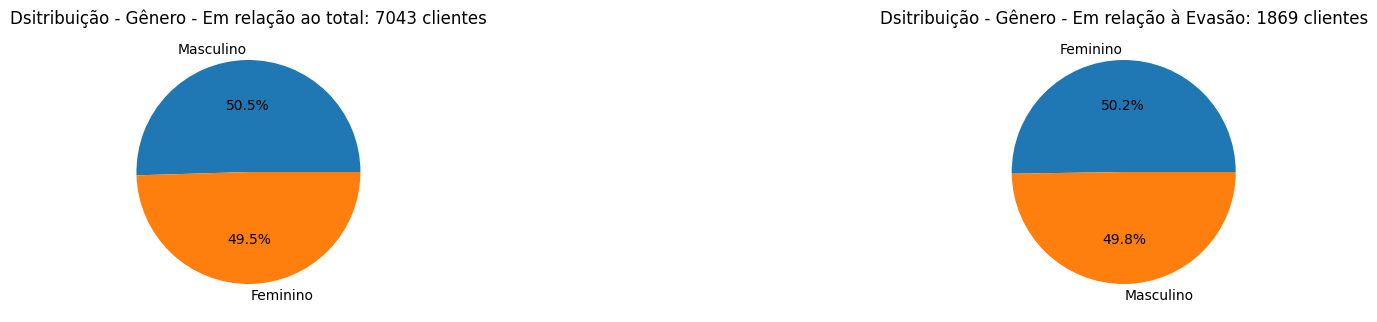

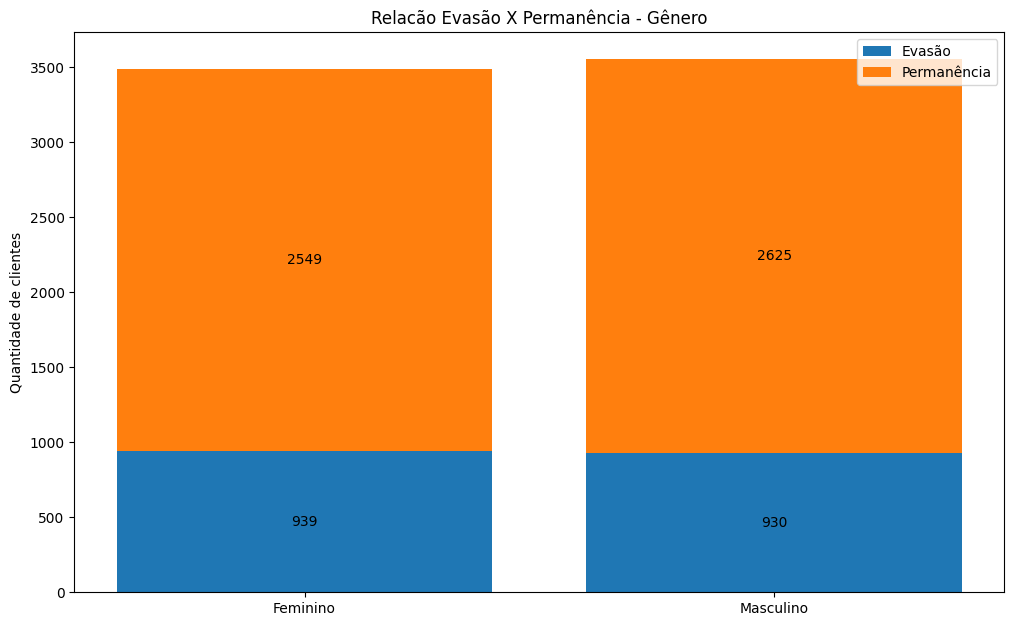

In [20]:
analise_qualitativa('Gênero')

<div class='alert alert-block alert-success'>
    <b>Gênero - sem impacto na taxa de evasão. <b>
</div>

## 1.2.2 - Evasão X Senioridade

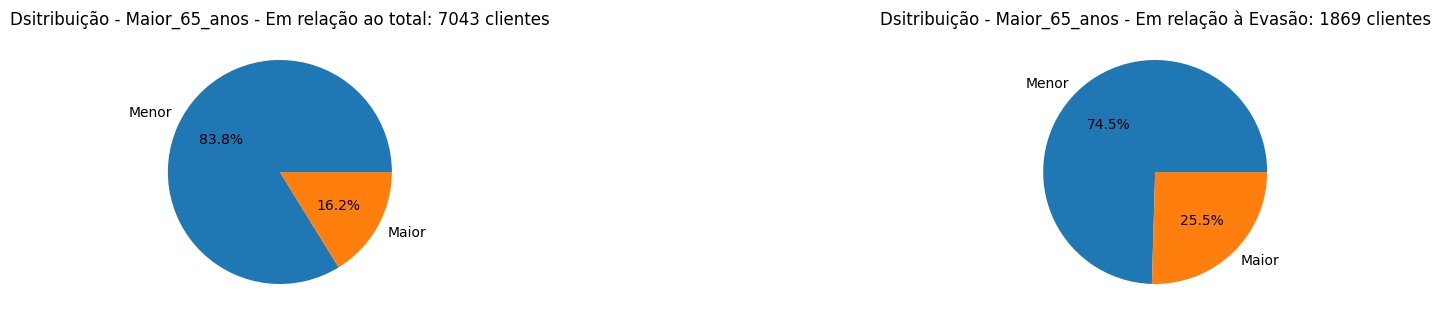

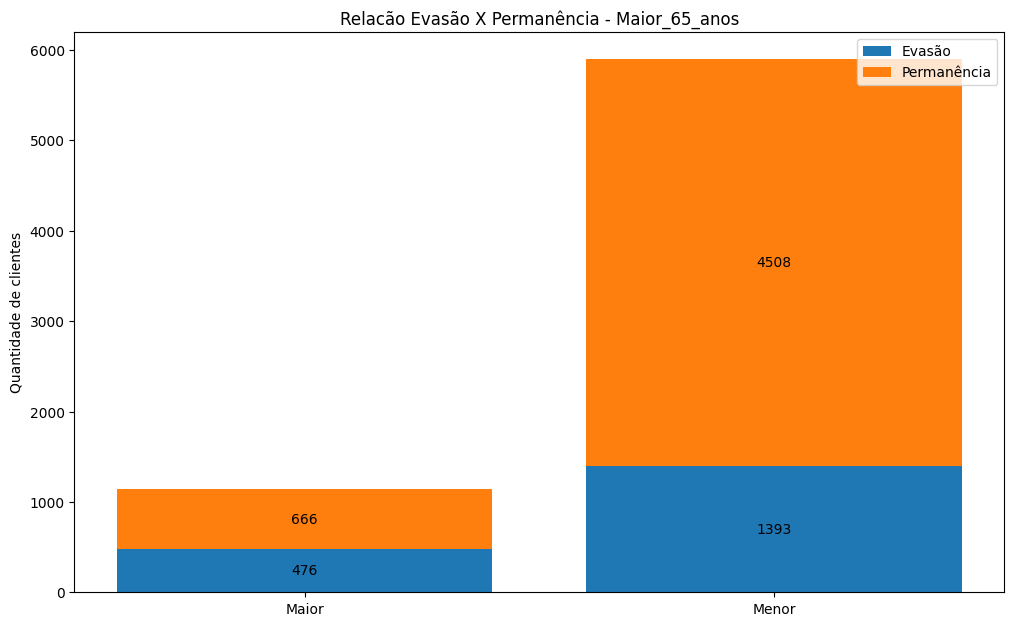

In [21]:
analise_qualitativa('Maior_65_anos')

<div class='alert alert-block alert-danger'>
    <b> Nota-se que, apesar da taxa de evasão dos menores de 65 anos (74,54%) ser bem maior que dos maiores de 65 anos (25,46%) em relação ao total de evasões, essa taxa é relativamente próxima à distribuição de faixas etárias analisadas. Entretanto, considerando as faixas etárias separadamente, a taxa de evasão dentro da faixa etária de maiores de 65 anos é bem alta (41,68%) e distante da taxa geral (26,5%), logo chama a atenção e deve ser considerada e analisada mais profundamente.<b>
</div>

## 1.2.3 - Evasão X Parceirxs

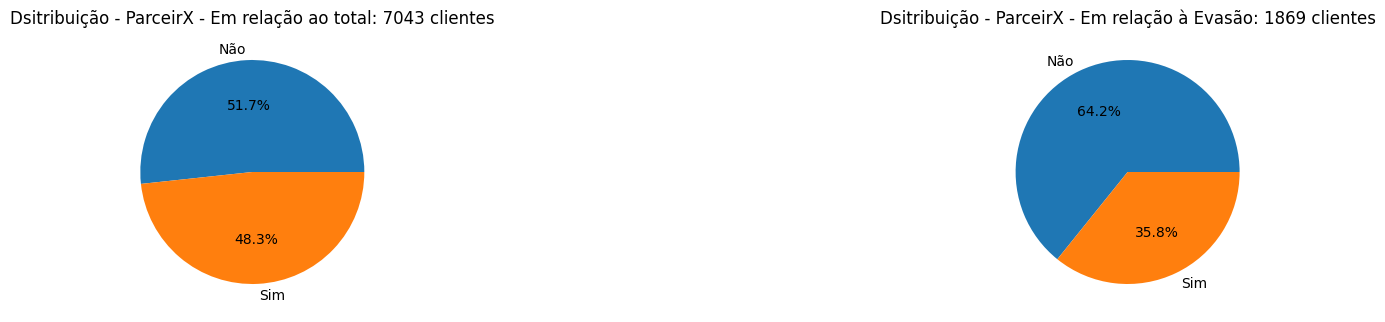

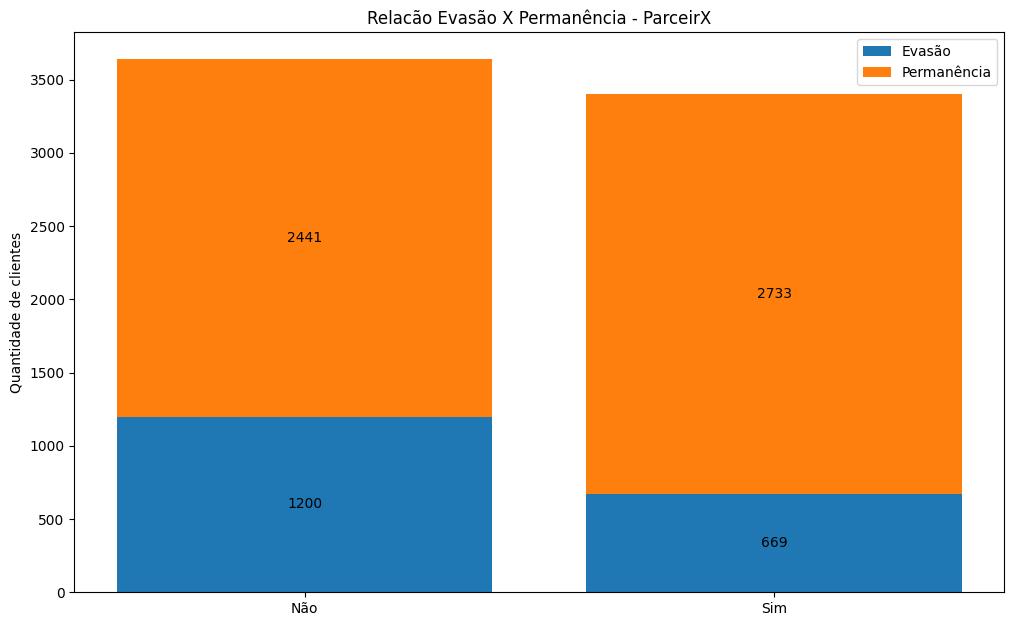

In [22]:
analise_qualitativa('ParceirX')

<div class='alert alert-block alert-danger'>
    <b> A distribuição entre pessoas com parceirx e sem é praticamente igual (aproximadamente 51% com parceiro e 49% sem), porém a taxa de evasão entre os clientes que não possuem parceirx é relativamente alta (33%), logo deve ser melhor analisada.
    </div>

## 1.2.4 - Evasão X Dependentes

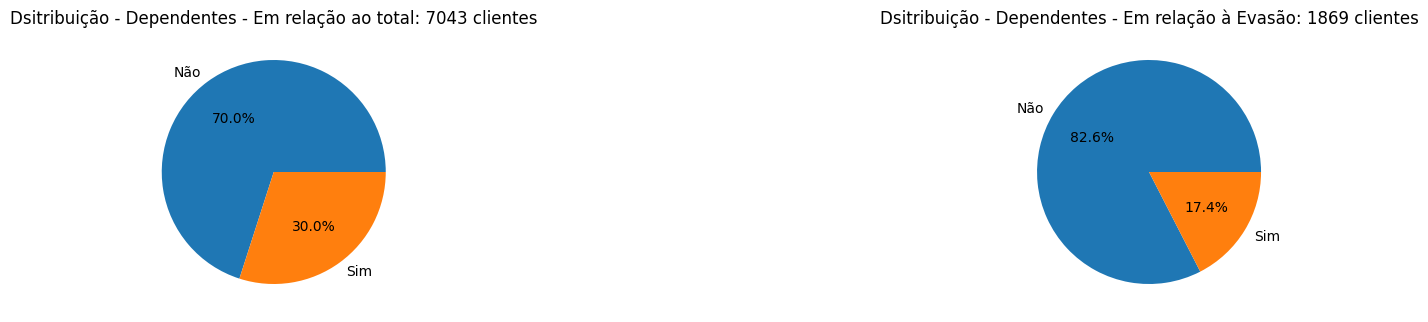

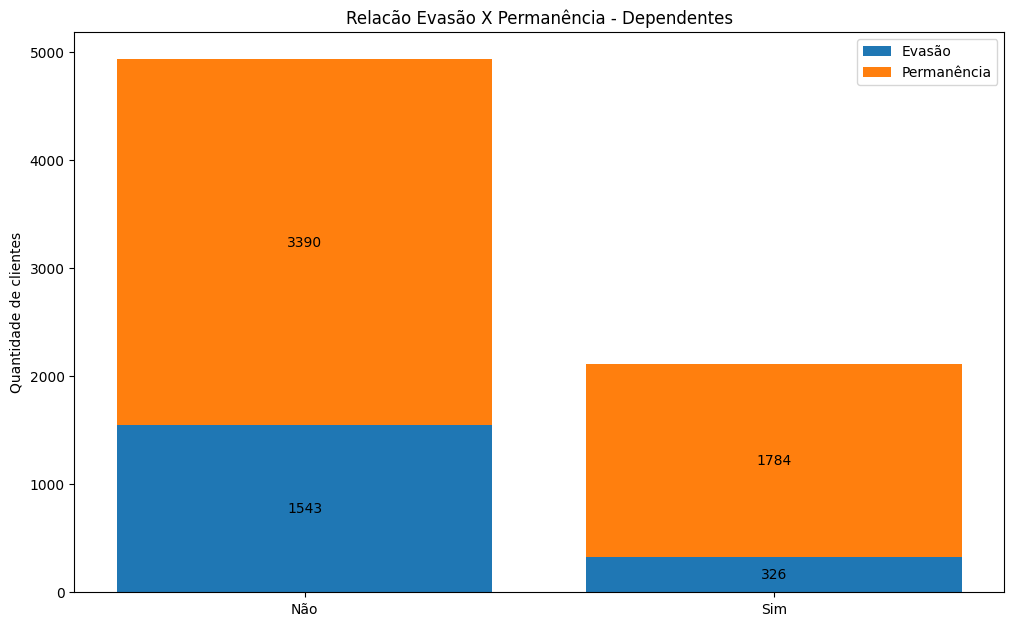

In [23]:
analise_qualitativa('Dependentes')

<div class='alert alert-block alert-danger'>
    <b>A taxa de evasão dos clientes que não possuem dependentes (31%) é considerável.
    </div>

## 1.2.5 - Evasão X Serviço Telefônico

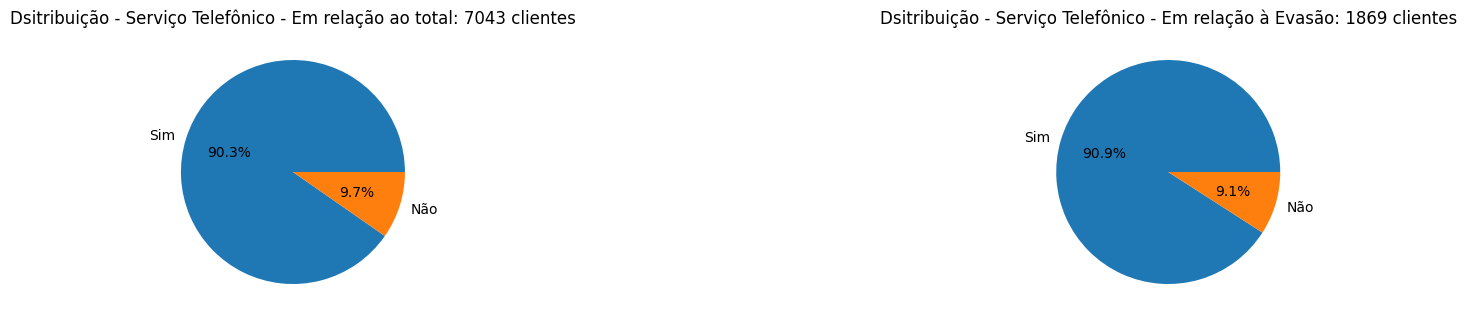

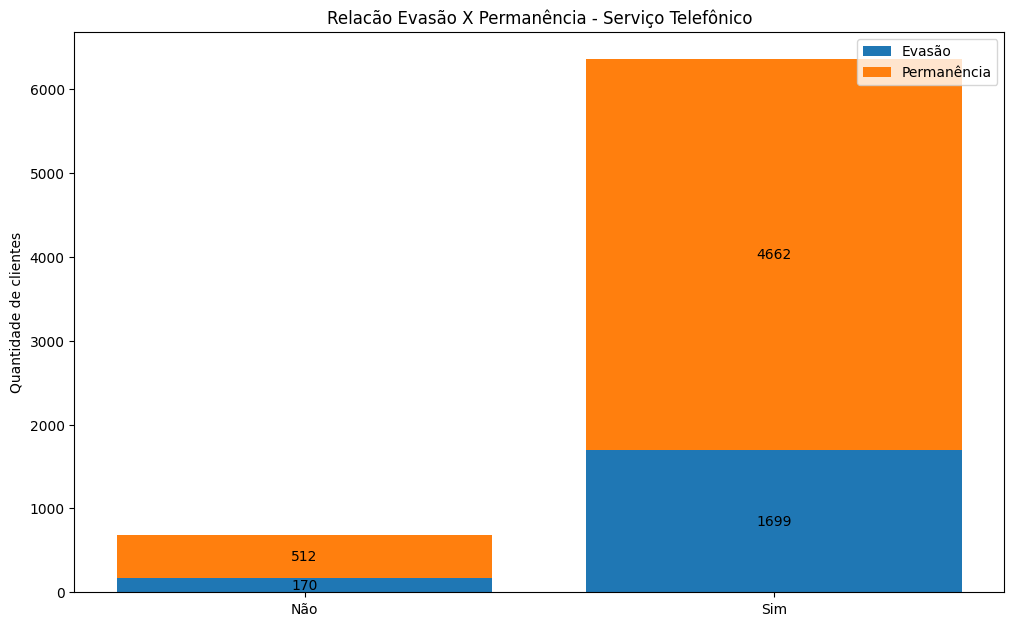

In [24]:
analise_qualitativa('Serviço Telefônico')

<div class='alert alert-block alert-success'>
    <b> O churn em relação ao Serviço Telefônico não se apresenta determinante na taxa de evasão geral.
</div>

## 1.2.6 - Evasão X Assinatura de Backup

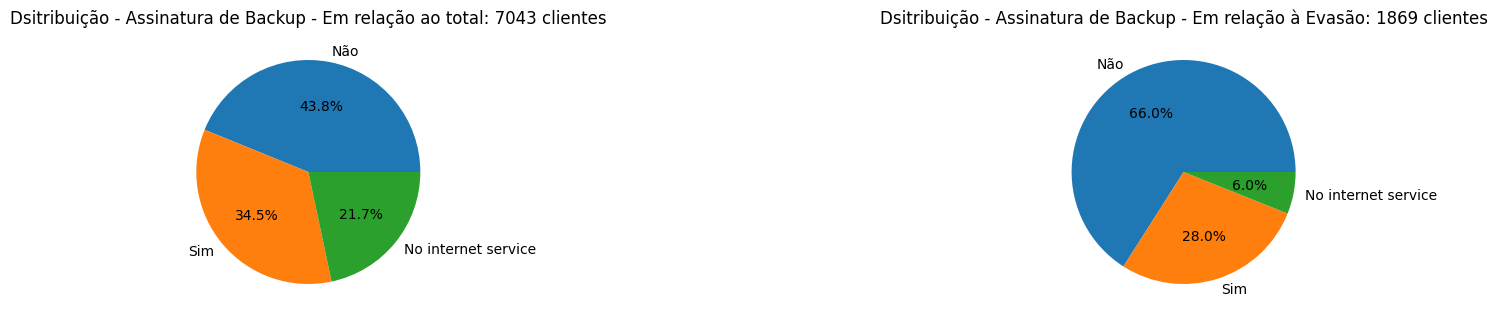

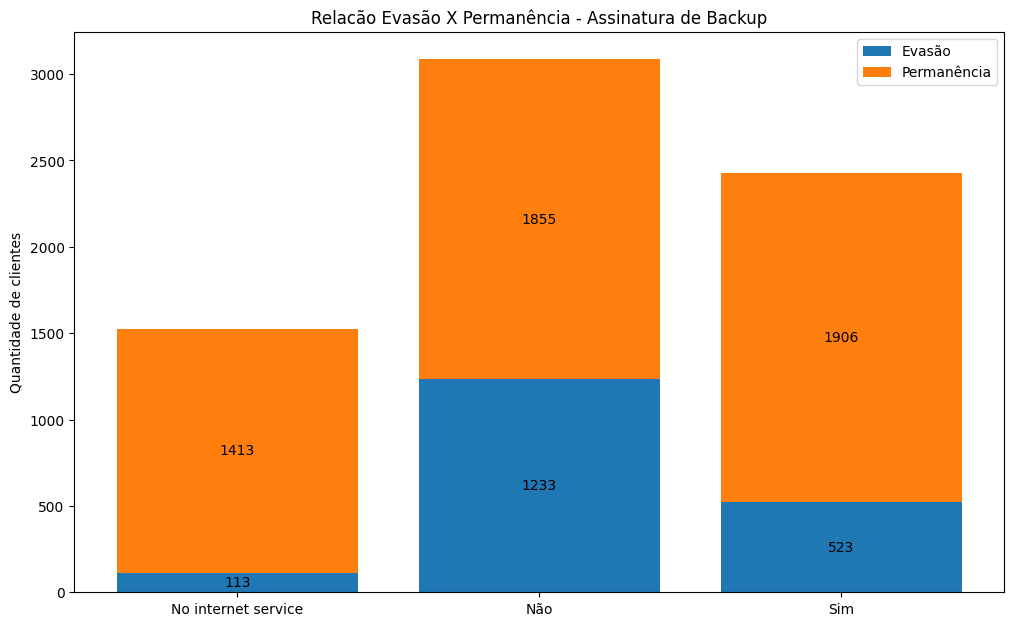

In [25]:
analise_qualitativa('Assinatura de Backup')

<div class='alert alert-block alert-danger'>
    <b> A taxa de evasão dos clientes sem assinatura de backup é alta em relação aos demais.
</div>

## 1.2.7 - Evasão X Assinatura de Proteção

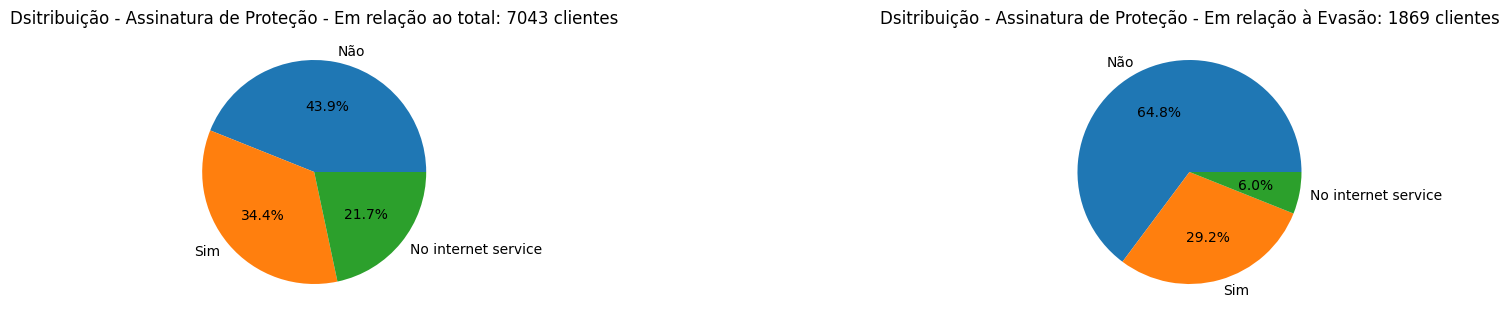

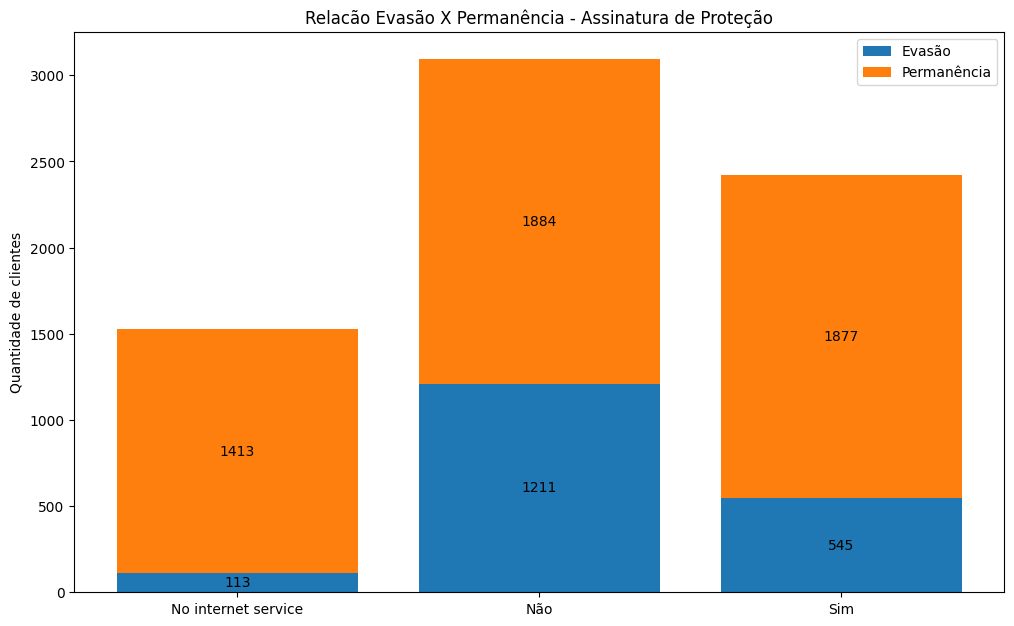

In [26]:
analise_qualitativa('Assinatura de Proteção')

<div class='alert alert-block alert-danger'>
    <b> A taxa de evasão dos clientes sem assinatura de proteção é alta em relação aos demais.
</div>

## 1.2.8 - Evasão X Assinatura de Suporte

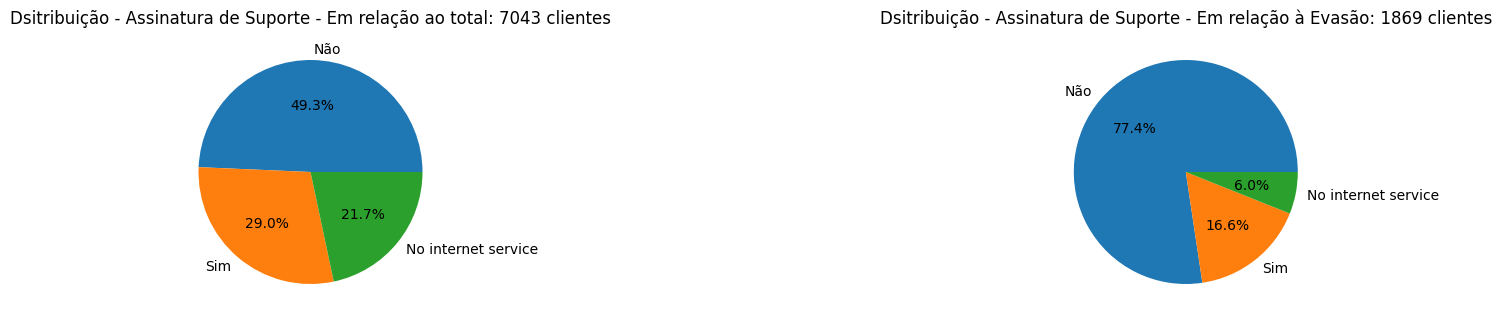

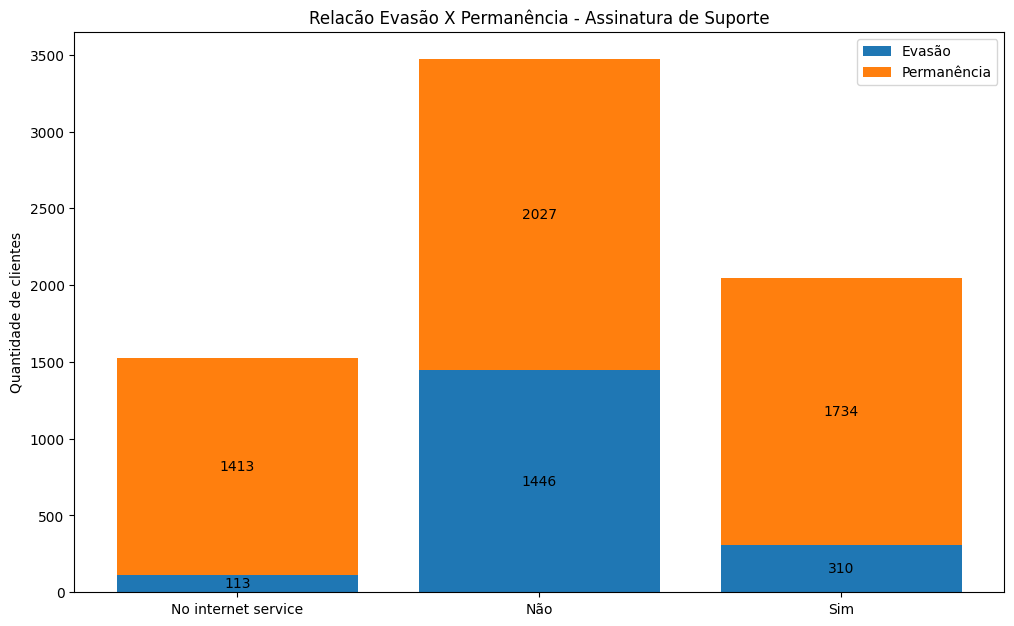

In [27]:
analise_qualitativa('Assinatura de Suporte')

<div class='alert alert-block alert-danger'>
    <b> A taxa de evasão dos clientes sem assinatura de suporte é alta em relação aos demais.
</div>

## 1.2.9 - Evasão X TV a cabo

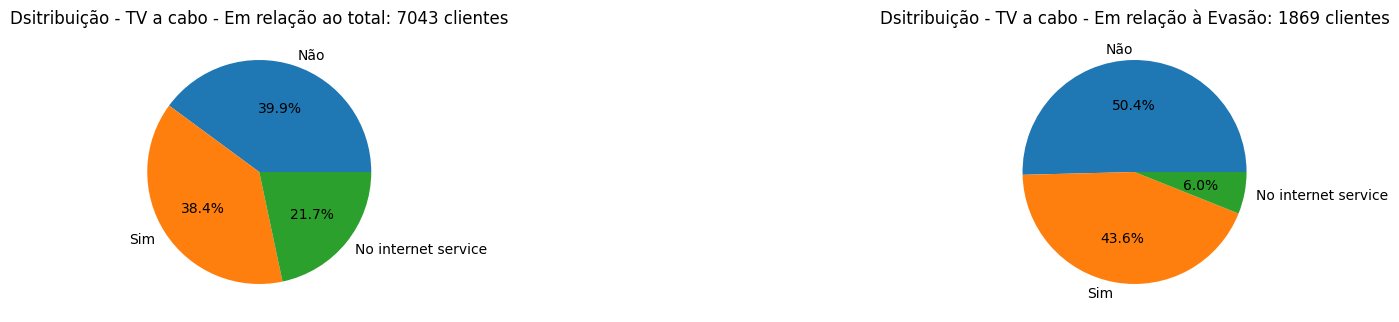

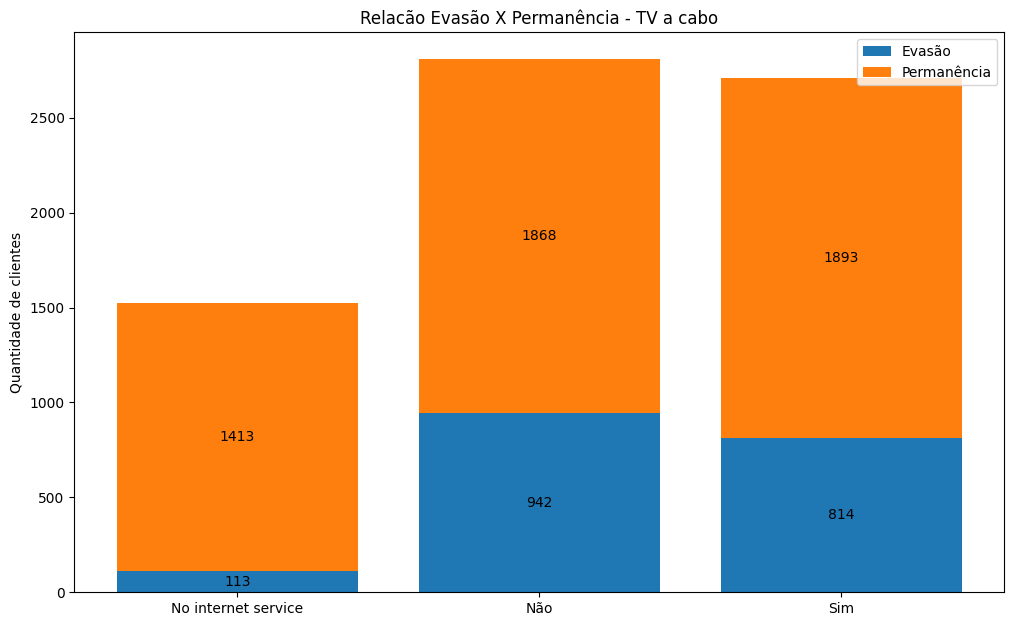

In [28]:
analise_qualitativa('TV a cabo')

<div class='alert alert-block alert-success'>
    <b> A taxa de evasão dos clientes com  e sem TV a cabo é alta, logo é inconclusiva.
</div>

## 1.2.10 - Evasão X Assinatura de Streaming

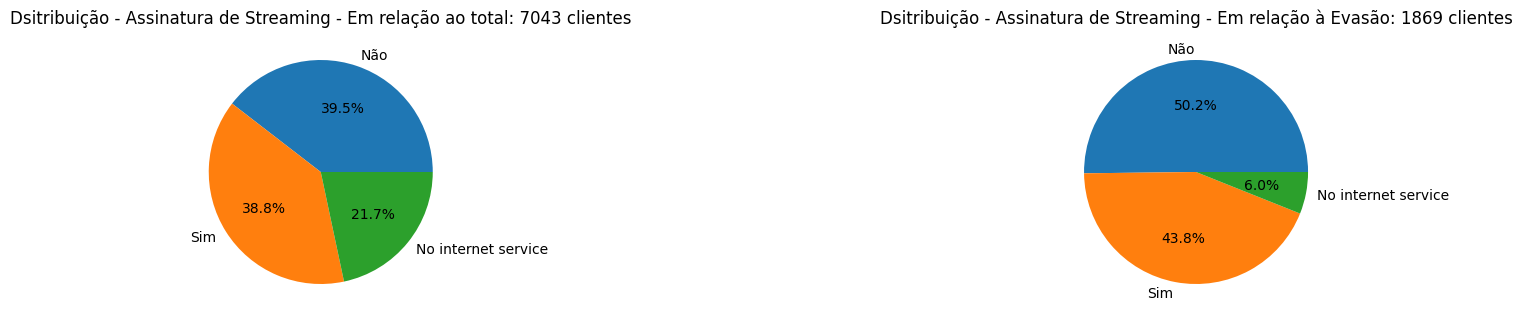

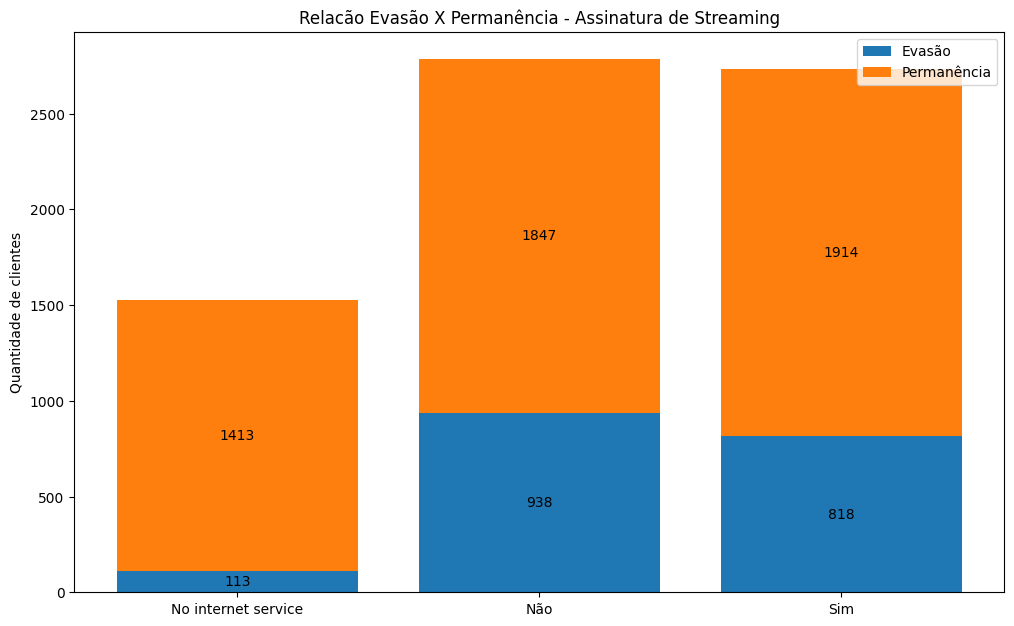

In [29]:
analise_qualitativa('Assinatura de Streaming')

<div class='alert alert-block alert-success'>
    <b> A taxa de evasão dos clientes tanto com quanto sem assinatura de streaming é alta, logo seria uma classificação inconclusiva.
</div>

## 1.2.11 - Evasão X Tipo de Contrato

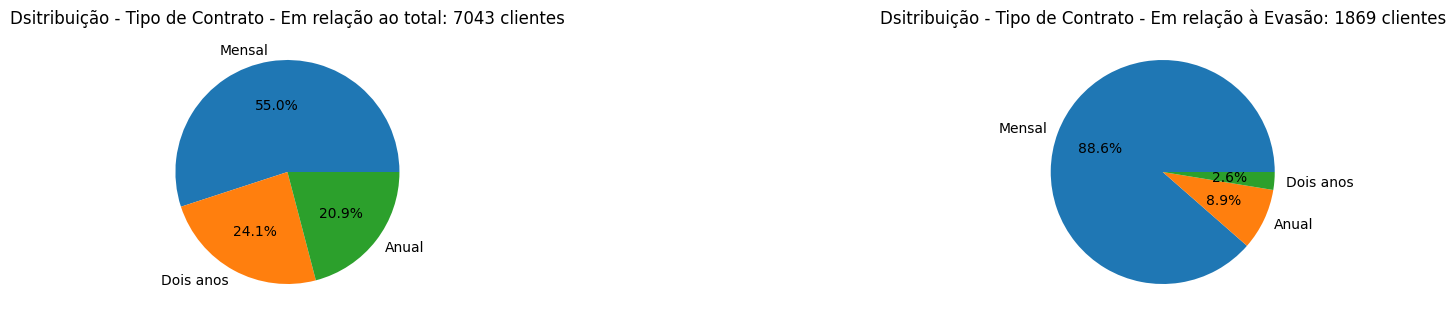

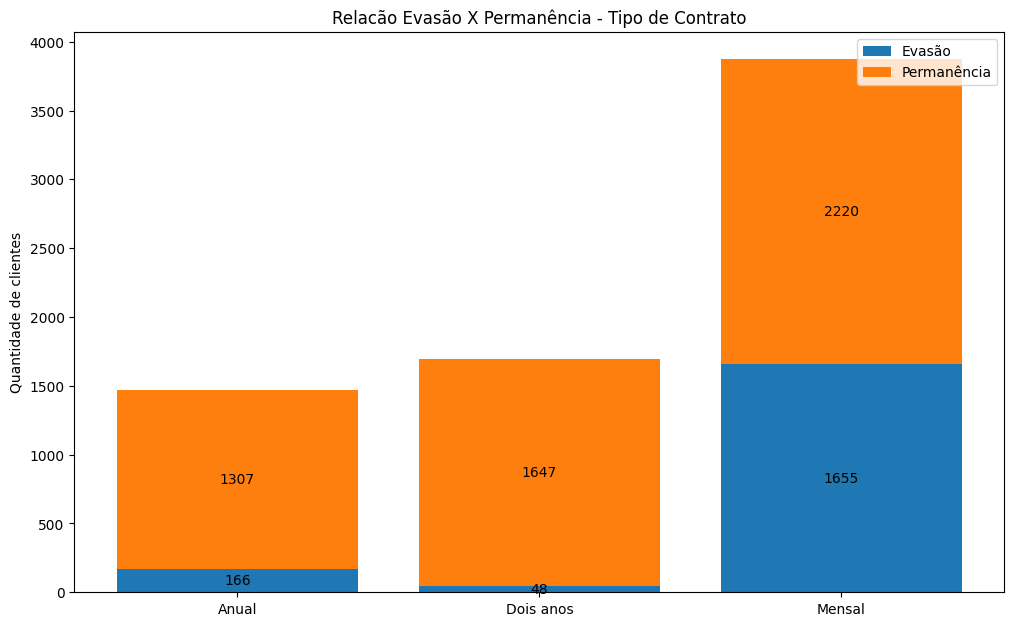

In [30]:
analise_qualitativa('Tipo de Contrato')

<div class='alert alert-block alert-danger'>
    <b> A taxa de evasão dos clientes com tipo de contrato mensal é alta (43%), logo deve ser considerada.
</div>

## 1.2.12 - Evasão X Fatura Online

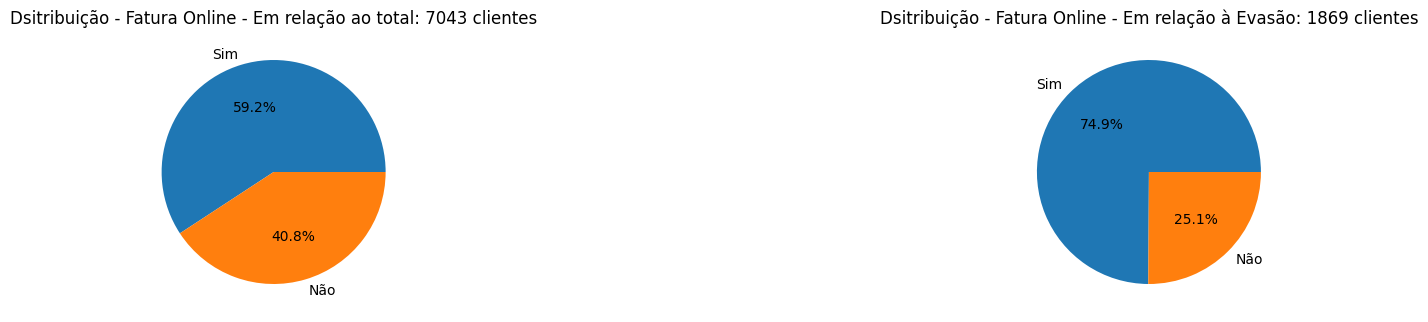

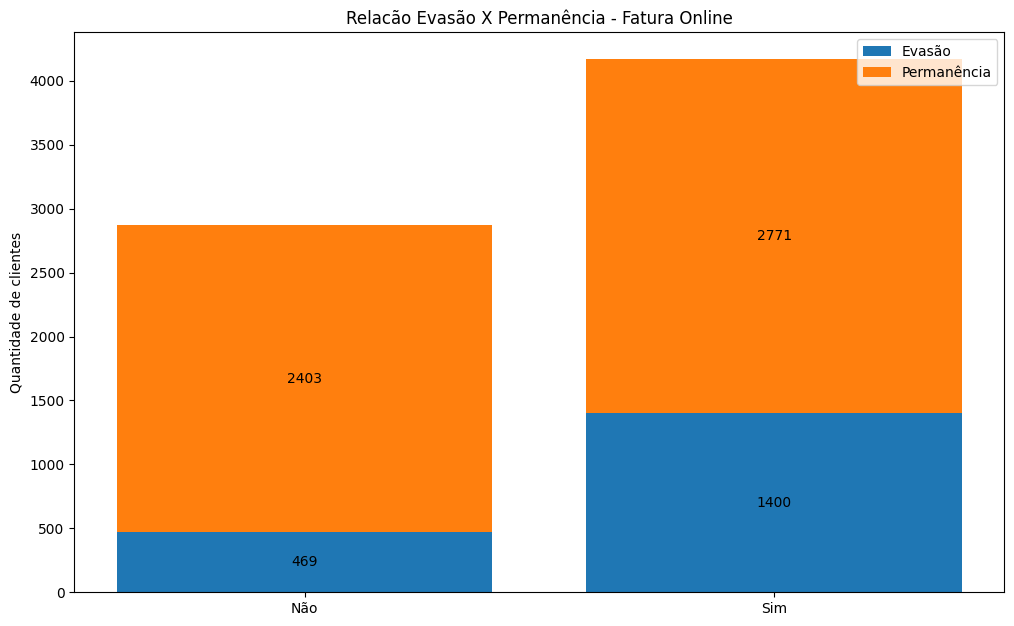

In [31]:
analise_qualitativa('Fatura Online')

<div class='alert alert-block alert-danger'>
    <b> A taxa de evasão dos clientes que recebem a fatura online é alta (33%), logo deve ser considerada.
</div>

## 1.2.13 - Evasão X Forma de Pagamento

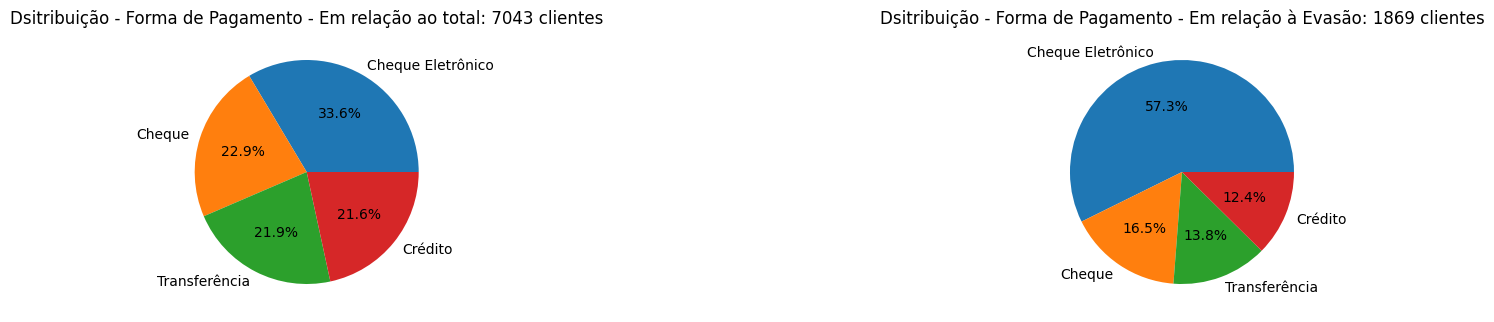

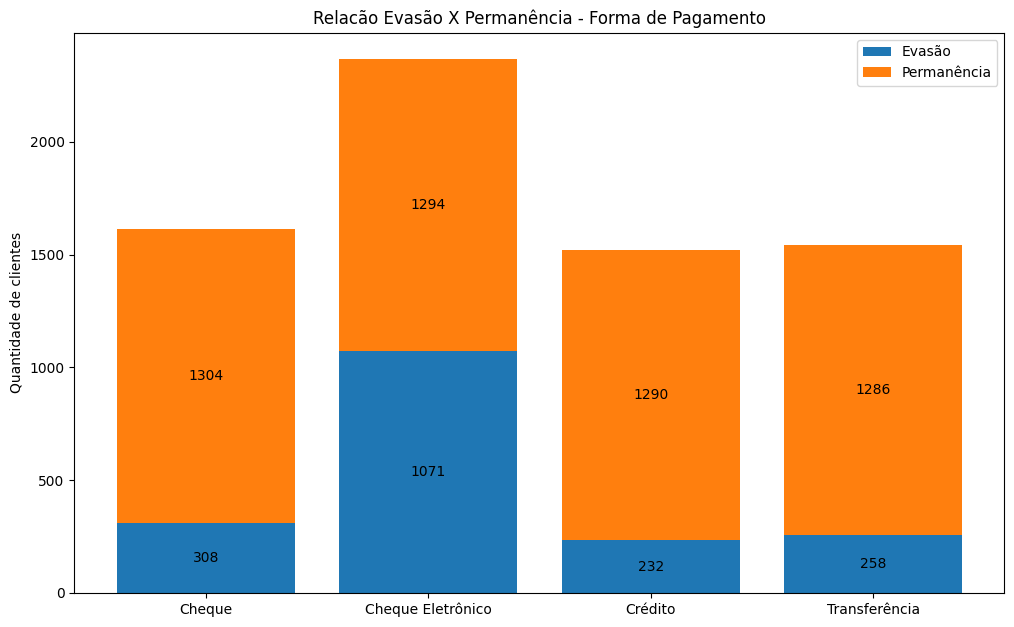

In [32]:
analise_qualitativa('Forma de Pagamento')

<div class='alert alert-block alert-danger'>
    <b> A taxa de evasão dos clientes que pagam com cheque eletrônico é alta (45%), logo deve ser considerada.
</div>

## 1.2.14 - Evasão X Mais de uma linha

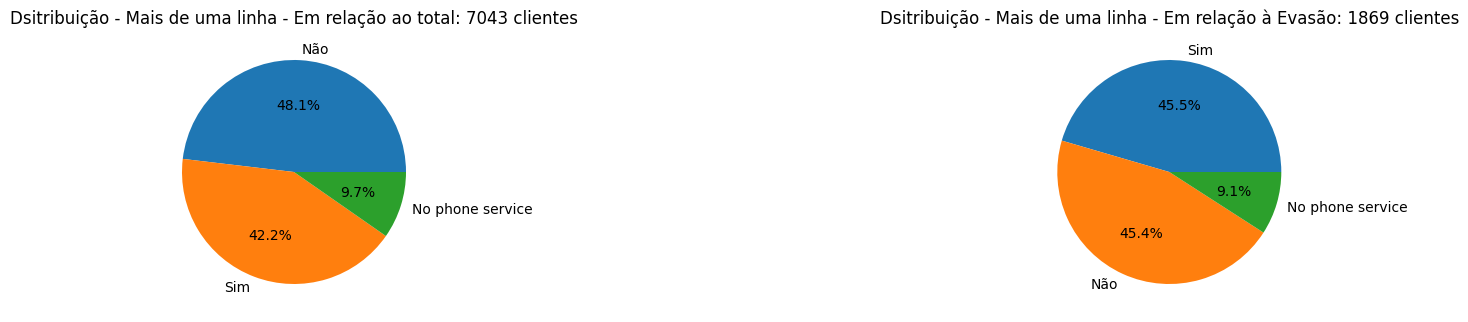

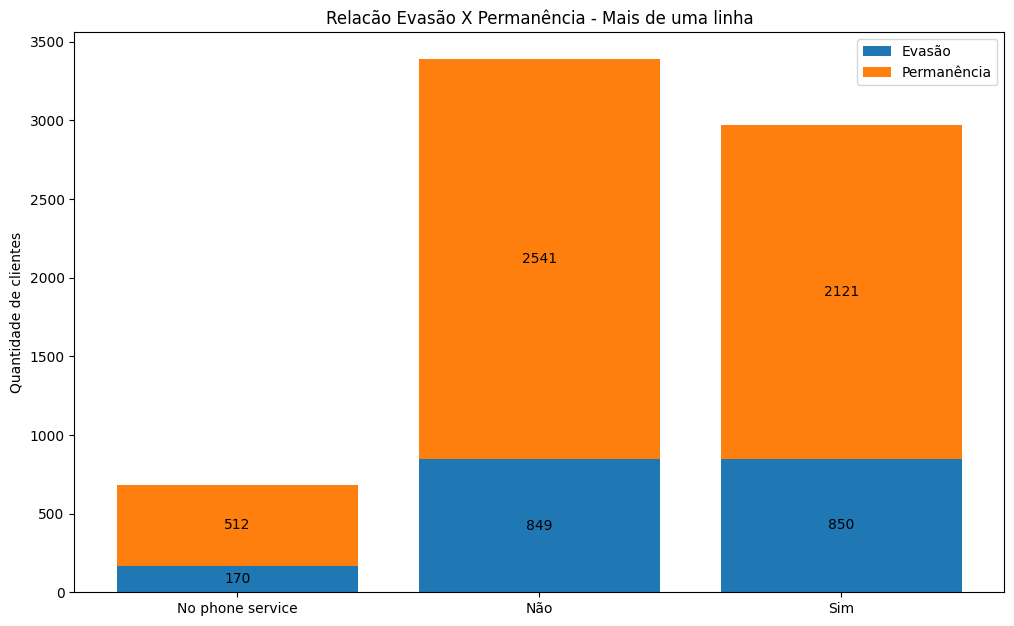

In [33]:
analise_qualitativa('Mais de uma linha')

<div class='alert alert-block alert-success'>
    <b> A taxa de evasão dos clientes com uma linha e mais de uma linha são baixas e próximas. Sem impacto no churn.
</div>

## 1.2.15 - Evasão X Serviço de Internet

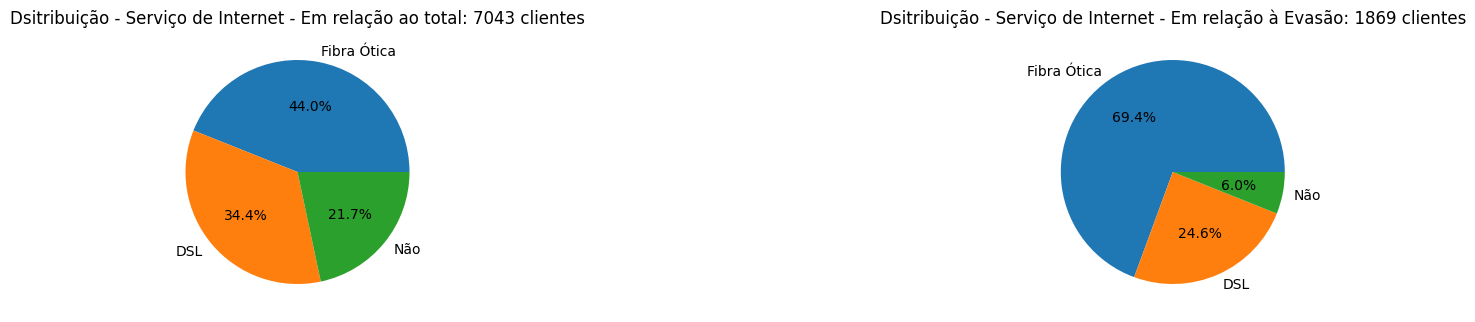

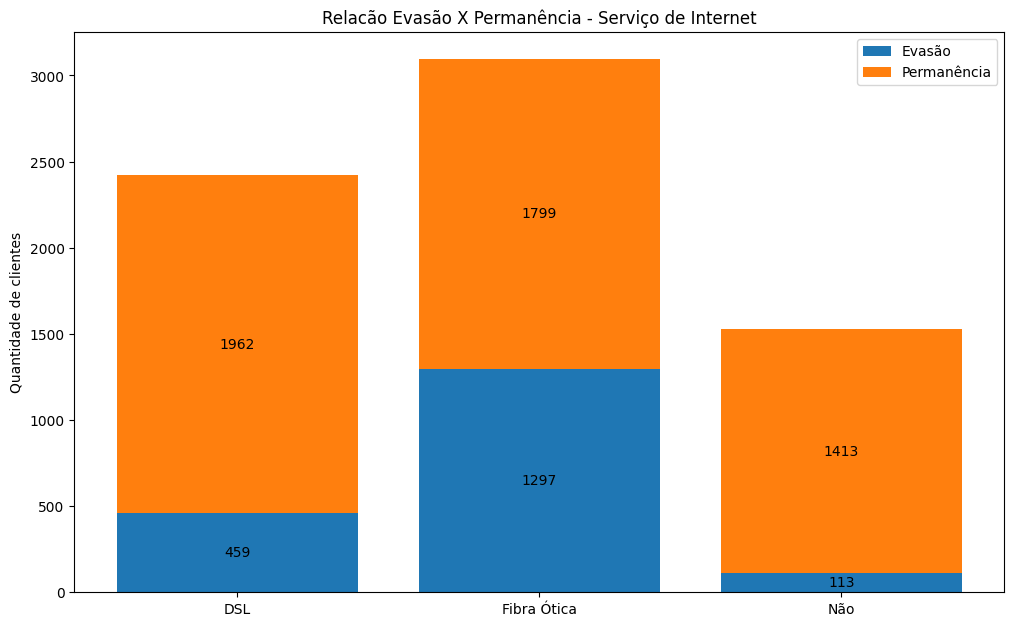

In [34]:
analise_qualitativa('Serviço de Internet')

<div class='alert alert-block alert-danger'>
    <b> Clientes que tem fibra ótica possuem uma taxa de evasão proporcionamente maior que os demais.
</div>

## 1.3 - Análise das Variáveis Quantitativas

In [35]:
dataset.head()

,Identificação,Evasão,Gênero,Maior_65_anos,ParceirX,Dependentes,Meses contratados,Serviço Telefônico,Mais de uma linha,Serviço de Internet,...,Assinatura de Backup,Assinatura de Proteção,Assinatura de Suporte,TV a cabo,Assinatura de Streaming,Tipo de Contrato,Fatura Online,Forma de Pagamento,Mensalidade,Total Gasto
0,0002-ORFBO,Não,Feminino,Menor,Sim,Sim,9,Sim,Não,DSL,...,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque,65.6,593.3
1,0003-MKNFE,Não,Masculino,Menor,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Não,Sim,Mensal,Não,Cheque,59.9,542.4
2,0004-TLHLJ,Sim,Masculino,Menor,Não,Não,4,Sim,Não,Fibra Ótica,...,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque Eletrônico,73.9,280.85
3,0011-IGKFF,Sim,Masculino,Maior,Sim,Não,13,Sim,Não,Fibra Ótica,...,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque Eletrônico,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Maior,Sim,Não,3,Sim,Não,Fibra Ótica,...,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque,83.9,267.4


## 1.3.1 - Evasão X Meses Contratados


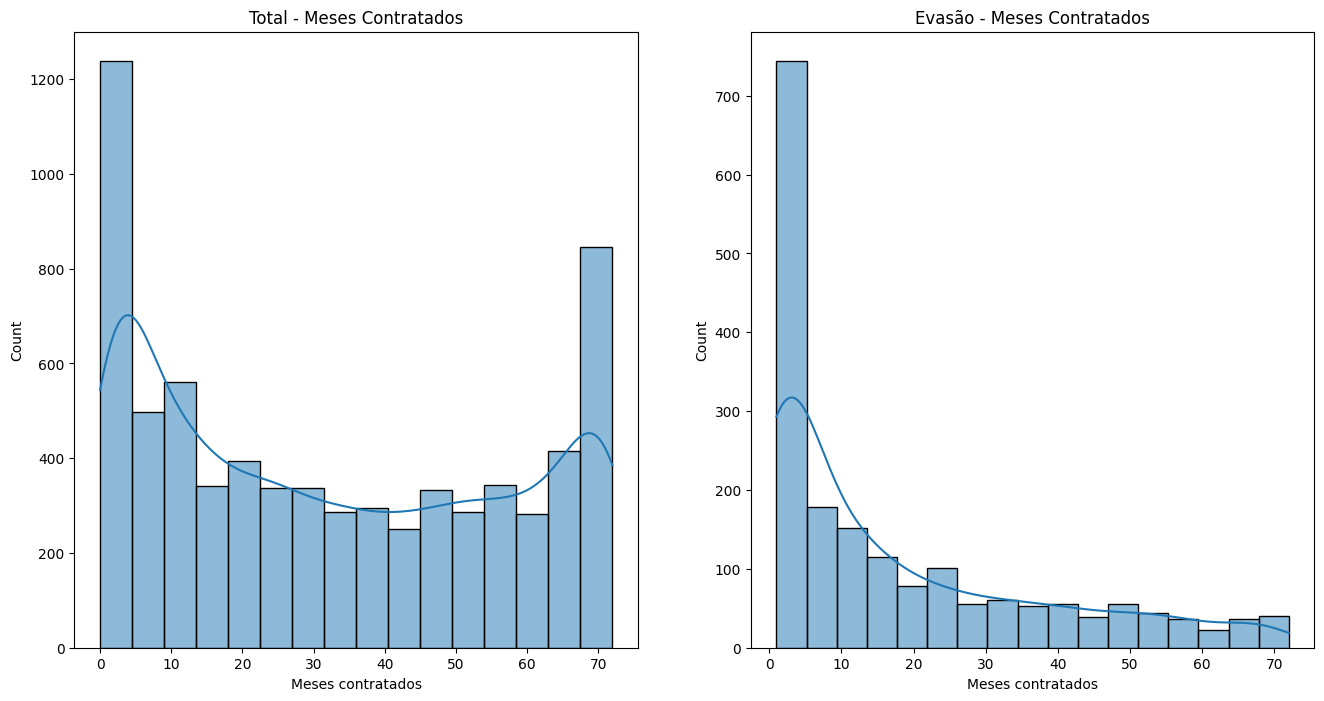

In [36]:
ax = plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(dataset['Meses contratados'], kde=True)
plt.title('Total - Meses Contratados')
plt.subplot(1,2,2)
sns.histplot(evasao['Meses contratados'], kde=True)
plt.title('Evasão - Meses Contratados')

ax =ax

<div class='alert alert-block alert-danger'>
    <b>Percebe-se uma alta taxa de evasão dos clientes com poucos meses contatados. 
</div>

## 1.3.2 - Evasão X Meses Contratados

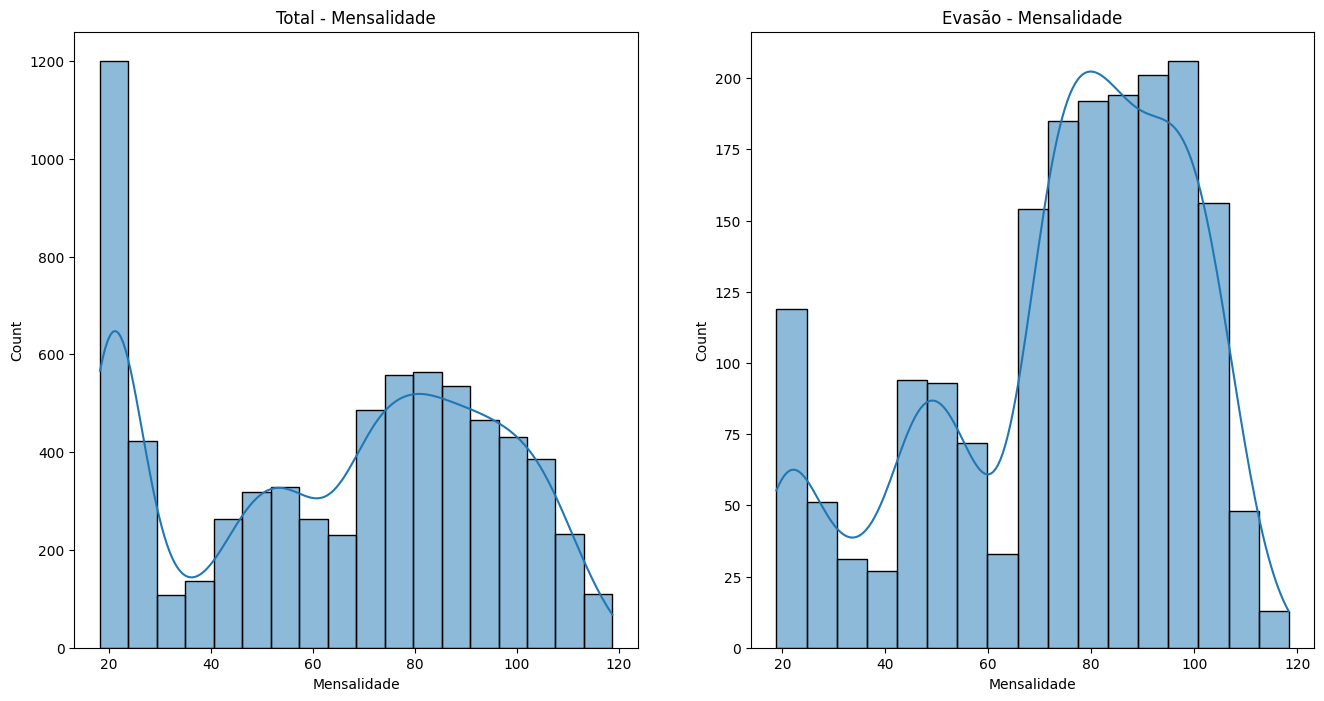

In [37]:
ax = plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(dataset['Mensalidade'], kde=True)
plt.title('Total - Mensalidade')
plt.subplot(1,2,2)
sns.histplot(evasao['Mensalidade'], kde=True)
plt.title('Evasão - Mensalidade')

ax = ax

<div class='alert alert-block alert-danger'>
    <b>Percebe-se uma alta taxa de evasão dos clientes com mensalidade entre 70 e 100. 
</div>

## Exportação do dataframe

In [38]:
analise_churn = dataset.to_json('analise_churn.json')